In [40]:
import pandas as pd # Para el manejo de los datos
import numpy as np # Para manejo de vectores y matrices
import matplotlib.pyplot as plt # Para los gráficos
import seaborn as sns # Para graficar el mapa de calor

from sklearn.feature_extraction.text import CountVectorizer # Para transformar el texto a vectores de frecuencia de palabra
from sklearn.feature_extraction.text import TfidfVectorizer # Para convertir texto a vectores de recuento de palabras
from sklearn.feature_extraction.text import HashingVectorizer # Para convertir texto a enteros únicos

from sklearn.model_selection import train_test_split # Para dividir el DataSet

from sklearn.naive_bayes import ComplementNB # Para el algoritmo Complemente Naive Bayes

from yellowbrick.classifier import ClassificationReport # Para graficar el reporte de clasificación
from sklearn.metrics import confusion_matrix # Para obtener la matriz de confución
from sklearn.metrics import classification_report # Para mostrar el reporte de clasificación

## Cargamos los datos procesados

In [41]:
df = pd.read_csv("Data_procesada/datos_procesados.csv", sep=";", encoding='utf-8')

## Función para convertir texto a vectores de frecuencia de palabra

In [42]:
def transformarTFIDF():
    vectorizer_TFIDF = TfidfVectorizer(
        input='content', 
        encoding='utf-8', 
        decode_error='strict', 
        strip_accents=None, 
        lowercase=None, 
        preprocessor=None, 
        tokenizer=None, 
        analyzer='word', 
        stop_words=None, 
        token_pattern=r'(?u)\b\w\w+\b', 
        ngram_range=(1, 1), 
        max_df=0.8, 
        min_df=7, 
        max_features=50, 
        vocabulary=None, 
        binary=False, 
        dtype=np.float64, 
        norm='l2', 
        use_idf=True, 
        smooth_idf=True, 
        sublinear_tf=False
    )
    vector = vectorizer_TFIDF.fit_transform(df['MENSAJES']).toarray()
    return vector

## Función para convertir texto a vectores de recuento de palabras

In [43]:
def transformarCountVectorizer():
    vectorizer_count_vectorizer = CountVectorizer(
        input='content', 
        encoding='utf-8', 
        decode_error='strict', 
        strip_accents=None, 
        lowercase=None, 
        preprocessor=None, 
        tokenizer=None, 
        stop_words=None, 
        token_pattern=r'(?u)\b\w\w+\b', 
        ngram_range=(1, 1), 
        analyzer='word', 
        max_df=1.0, 
        min_df=1, 
        max_features=None, 
        vocabulary=None, 
        binary=False, 
        dtype=np.int64
    )
    vector = vectorizer_count_vectorizer.fit_transform(df['MENSAJES']).toarray()
    return vector

## Función para convertir texto a enteros únicos

In [44]:
def transformarHashingVectorizer():
    vectorizer_hashing_vectorizer = HashingVectorizer(
        input='content', 
        encoding='utf-8', 
        decode_error='strict', 
        strip_accents=None, 
        lowercase=None, 
        preprocessor=None, 
        tokenizer=None, 
        stop_words=None, 
        token_pattern=r'(?u)\b\w\w+\b', 
        ngram_range=(1, 1), 
        analyzer='word', 
        n_features=100, 
        binary=False, 
        norm='l2', 
        alternate_sign=True, 
        dtype=np.float64
    )
    vector = vectorizer_hashing_vectorizer.fit_transform(df['MENSAJES']).toarray()
    return vector

In [45]:
#vector_ = transformarTFIDF()
vector_ = transformarCountVectorizer()
#vector_ = transformarHashingVectorizer()

## Dividir DATSET:
### DATOS DE ENTRENAMIENTO = 80%
### DATOS DE TEST = 20%

In [46]:
def dividirDataSet(vector):
    labels = df['POLARIDAD'].iloc[:].values
    X_train, X_test, y_train, y_test = train_test_split(
        vector, 
        labels, 
        test_size=0.20,
        train_size=None, 
        random_state=0,
        shuffle=True,
        stratify=None,
    )
    return X_train, X_test, y_train, y_test

In [47]:
X_train, X_test, y_train, y_test = dividirDataSet(vector_)

## Función para crear el modelo con el algoritmo Complement Naive Bayes

El clasificador de Complement Naive Bayes descrito en Rennie et al. (2003). Es especialmente adecuado para conjuntos de datos desequilibrados.

In [48]:
def ComplementNaiveBayes():
    classifier = ComplementNB(
        alpha=1.0, 
        fit_prior=False, 
        class_prior=None, 
        norm=False
    )
    return classifier

## Función para entrenar el modelo

In [49]:
def entrenarModelo(classifier, X_train, y_train):
    return classifier.fit(X_train, y_train)

## Función para testear el modeo

In [50]:
def probarModelo(classifier_fit, X_test):
    return classifier_fit.predict(X_test)

## Función para graficar graficar la matriz de confución

In [51]:
def graficarMatrizConfucion(y_test, predictions):
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(9.1, 9.1))
    sns.heatmap(
        conf_matrix, 
        xticklabels=['Negativo','Neutro','Positivo'], 
        yticklabels=['Negativo','Neutro','Positivo'], 
        annot=True, 
        fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

## Función para graficar los resultados

In [52]:
def graficarReporte(X_train, y_train, classifier):
    visualizer = ClassificationReport(classifier, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

## Función para imprimir los resultados

In [53]:
def imprimirResultados(y_test, predictions):
    print(classification_report(y_test, predictions))

In [54]:
classifier = ComplementNaiveBayes()
classifier_fit = entrenarModelo(classifier, X_train, y_train)
predictions = probarModelo(classifier_fit, X_test)

In [59]:
(i, j, k) = 0, 0, 0
for x in y_test:
    if x == 'negativo':
        i += 1
    if x == 'neutro':
        j += 1
    if x == 'positivo':
        k += 1
print('Total negativos - Clase 0: ',i)
print('Total neutro   -  Clase 1: ', j)
print('Total positivo -  Clase 2: ', k)
print('total: ',i+j+k)

Total negativos - Clase 0:  30
Total neutro   -  Clase 1:  9
Total positivo -  Clase 2:  310
total:  349


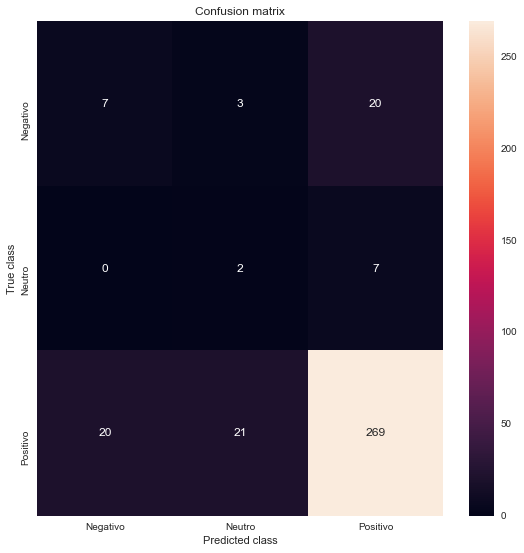

In [60]:
graficarMatrizConfucion(y_test, predictions)

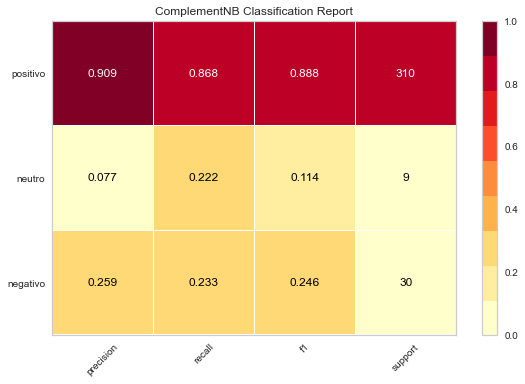

In [56]:
graficarReporte(X_train, y_train, classifier_fit)

In [57]:
imprimirResultados(y_test, predictions)

              precision    recall  f1-score   support

    negativo       0.26      0.23      0.25        30
      neutro       0.08      0.22      0.11         9
    positivo       0.91      0.87      0.89       310

    accuracy                           0.80       349
   macro avg       0.41      0.44      0.42       349
weighted avg       0.83      0.80      0.81       349



In [58]:
from sklearn.model_selection import GridSearchCV
classifier = ComplementNB()
params = {
    'alpha': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    }

grid = GridSearchCV(classifier, params, cv=10)
grid.fit(X_train, y_train)
grid.best_estimator_.get_params()

{'alpha': 5.0, 'class_prior': None, 'fit_prior': True, 'norm': False}